# Clustering de Club 

Groupe 10 : Aleandre Ly, Ismail Naziz, Paul Paquin, Charlène Petit

*Ce Notebook a pour but de répartir en différents clusters les équipes des 5 ligues majeures sur une même saison selon leurs besoins et leurs forces sur le terrain pour pouvoir ensuite définir une mesure de désirabilité* 
- Ce Notebook a produit une table de la forme :
['score_off', 'score_mid', 'score_def', 'off', 'mid', 'def', 'resume','Team']
- Ce Notebook prend en entrée une concatenation de tables des statistiques des équipes des 5 ligues majeures pour une même saison

 # I - IMPORTS

In [1]:
import pandas as pd
import sklearn
import numpy as np

# II - BESOINS EQUIPES

In [2]:
# UTILE
Annee = ["2016-2017","2017-2018","2018-2019"]
Ligue = ["Bundesliga","Ligue1","Premier League","La Liga","Serie A"]

In [3]:
# DONNEES
df = pd.read_csv("Team_Stats_"+Annee[0]+"_"+Ligue[0]+".csv").drop("Unnamed: 0",axis=1)

## Description des tables

In [4]:
def description(data_foot):
    # write your code here:
    num_des=data_foot.describe()
    cate_des=data_foot.describe(include=['object'])
    return num_des,cate_des

In [7]:
desc = description(df)[0]
desc

,Shots conceded pg,Tackles pg,Interceptions pg,Fouls pg,Offsides pg,Shots pg,Shots OT pg,Dribbles pg,Fouled pg,Open Play,Counter Attack,Set Piece,Penalty,Own Goal,Cross pg,Through Ball pg,Long Balls pg,Short Passes pg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,12.472222,18.722222,20.616667,14.316667,2.311111,12.477778,4.422222,8.061111,13.755556,28.277778,5.388889,10.222222,3.944444,0.888889,13.722222,0.333333,69.722222,384.555556
std,1.901951,1.592835,2.155499,1.522865,0.503971,2.098054,0.995611,1.955126,1.163272,11.811288,2.872566,3.245912,1.924218,1.022620,2.396212,0.485071,6.542221,101.211614
min,8.900000,16.500000,16.300000,10.600000,1.600000,10.000000,2.800000,5.100000,11.700000,13.000000,1.000000,6.000000,0.000000,0.000000,10.000000,0.000000,57.000000,243.000000
25%,11.625000,17.500000,19.525000,13.925000,1.900000,10.950000,3.700000,7.000000,13.025000,19.250000,3.000000,8.000000,3.000000,0.000000,12.000000,0.000000,65.500000,307.500000
50%,12.500000,18.350000,20.600000,14.550000,2.350000,12.150000,4.300000,7.950000,13.700000,27.000000,5.000000,11.000000,4.500000,1.000000,13.000000,0.000000,70.500000,376.000000
75%,13.625000,20.000000,22.050000,15.100000,2.600000,13.075000,5.025000,8.550000,14.100000,33.750000,7.000000,12.750000,5.000000,1.000000,15.000000,1.000000,74.750000,422.000000
max,16.000000,21.800000,24.400000,16.600000,3.400000,18.300000,6.800000,12.300000,16.000000,57.000000,11.000000,16.000000,7.000000,4.000000,20.000000,1.000000,83.000000,656.000000


In [8]:
df_num = df[['Shots conceded pg', 'Tackles pg', 'Interceptions pg',
       'Fouls pg', 'Offsides pg', 'Shots pg', 'Shots OT pg', 'Dribbles pg',
       'Fouled pg', 'Open Play', 'Counter Attack', 'Set Piece', 'Penalty',
       'Own Goal', 'Cross pg', 'Through Ball pg', 'Long Balls pg',
       'Short Passes pg']]

In [9]:
# Normalisation
df_num_norm = (df_num-df_num.min())/(df_num.max()-df_num.min())
df_num_norm_sans_bayern = (df_num-df_num.min())/(df_num.max()-df_num.min())

In [10]:
df_num_norm['Team'] = df['Team'].tolist()

## Dictionnaire des besoins/scores

In [ ]:
### SCORE GLOBAL
## SCORE OFFENSIF (33%)
# + 
'Shots pg'
'Shots OT pg'
'Dribbles pg'
'Fouled pg'
# - ()
'Offsides pg'

## SCORE DEFENSIF (33%)
# +
"Shots conceded pg",
"Tackles pg"
"Interceptions pg"
# -
'Shots conceded pg'
'Fouls pg'

## SCORE MILIEU (33%)
# + 
"Short Passes pg"
"Through Ball pg"
"Long Balls pg"

In [11]:
#dic_off
dic_off = {'Shots pg':0.60,
           'Shots OT pg':0.15,
           'Dribbles pg':+0.15,
           'Fouled pg':+0.05,
           'Offsides pg':-0.05}
#dic_def
dic_def = {
    "Shots conceded pg" : 0.6 ,
    "Tackles pg" : 0.15,
    "Interceptions pg" : 0.15,
    'Shots conceded pg' : -0.05,
    'Fouls pg' : -0.05
}

#dic_mid
dic_mid = {"Short Passes pg" : 0.5,
           "Through Ball pg" : 0.2,
           "Long Balls pg" : 0.3}

In [12]:
dico_list=[dic_off,dic_mid,dic_def]

def score_f(team,list_dico):
    L = []
    score = 0
    
    for i in range(len(list_dico)):
        for attribut in list_dico[i].keys():
            coefficient = list_dico[i][attribut]
            score += coefficient*team[attribut]
        
        L.append(score)
        score = 0   
    score_attack = L[0]  
    score_middle = L[1] 
    score_defense = L[2] 
    
    return [score_attack,score_middle,score_defense]

In [13]:
def table_score(data,list_dico):
    nb_lines = data.shape[0]
    dico_score = {}
    dico_score['Team'] = []
    dico_score['Score'] = []
    
    for i in range(nb_lines):
        team = data.iloc[i]
        score = score_f(team,list_dico)
        dico_score['Team'].append(data.iloc[i]['Team'])
        dico_score['Score'].append(score)

    
    mini = min(dico_score['Score'])
    
    for i in range(nb_lines):
        for j in range(len(mini)):
            dico_score["Score"][i][j] = dico_score["Score"][i][j] -mini[j]
        
    maxi = max(dico_score['Score'])  
    
    for i in range(nb_lines):
        for j in range(len(mini)):
            dico_score["Score"][i][j] = (dico_score["Score"][i][j]*100)/maxi[j]

    df = pd.DataFrame.from_dict(dico_score)
    
    return df

# Exemple de Scores sur un exemple

In [15]:
df_score = table_score(df_num_norm,dico_list)
df_score["Score"].tolist()
scores_off = []
scores_mid = []
scores_def = []
for i in range(1,len(df_score["Score"].tolist())):
    scores = df_score["Score"].tolist()[i]
    scores_off.append(scores[0])
    scores_mid.append(scores[1])
    scores_def.append(scores[2])

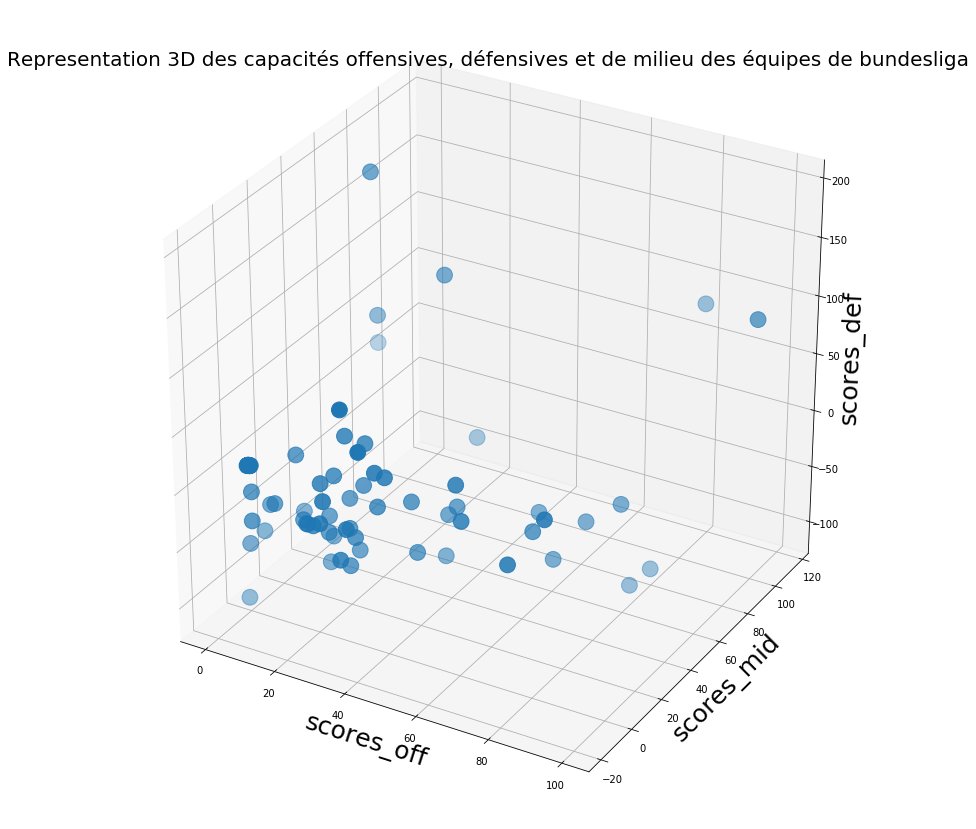

In [33]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d',)
ax.scatter([np.asarray(scores_off)], 
           np.asarray(scores_mid), 
           np.asarray(scores_def),
           marker='.',
           s = 1000)

ax.set_xlabel('scores_off',size = 25)
ax.set_ylabel('scores_mid',size = 25)
ax.set_zlabel('scores_def',size = 25)

ax.set_title('Representation 3D des capacités offensives, défensives et de milieu des équipes de bundesliga',size = 20)

plt.show()


# Création des clusters

In [17]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(df_score["Score"].tolist())[1:]
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X)

Text(0.5, 0.92, 'Representation 3D des capacités offensives, défensives et de milieu des équipes de bundesliga')

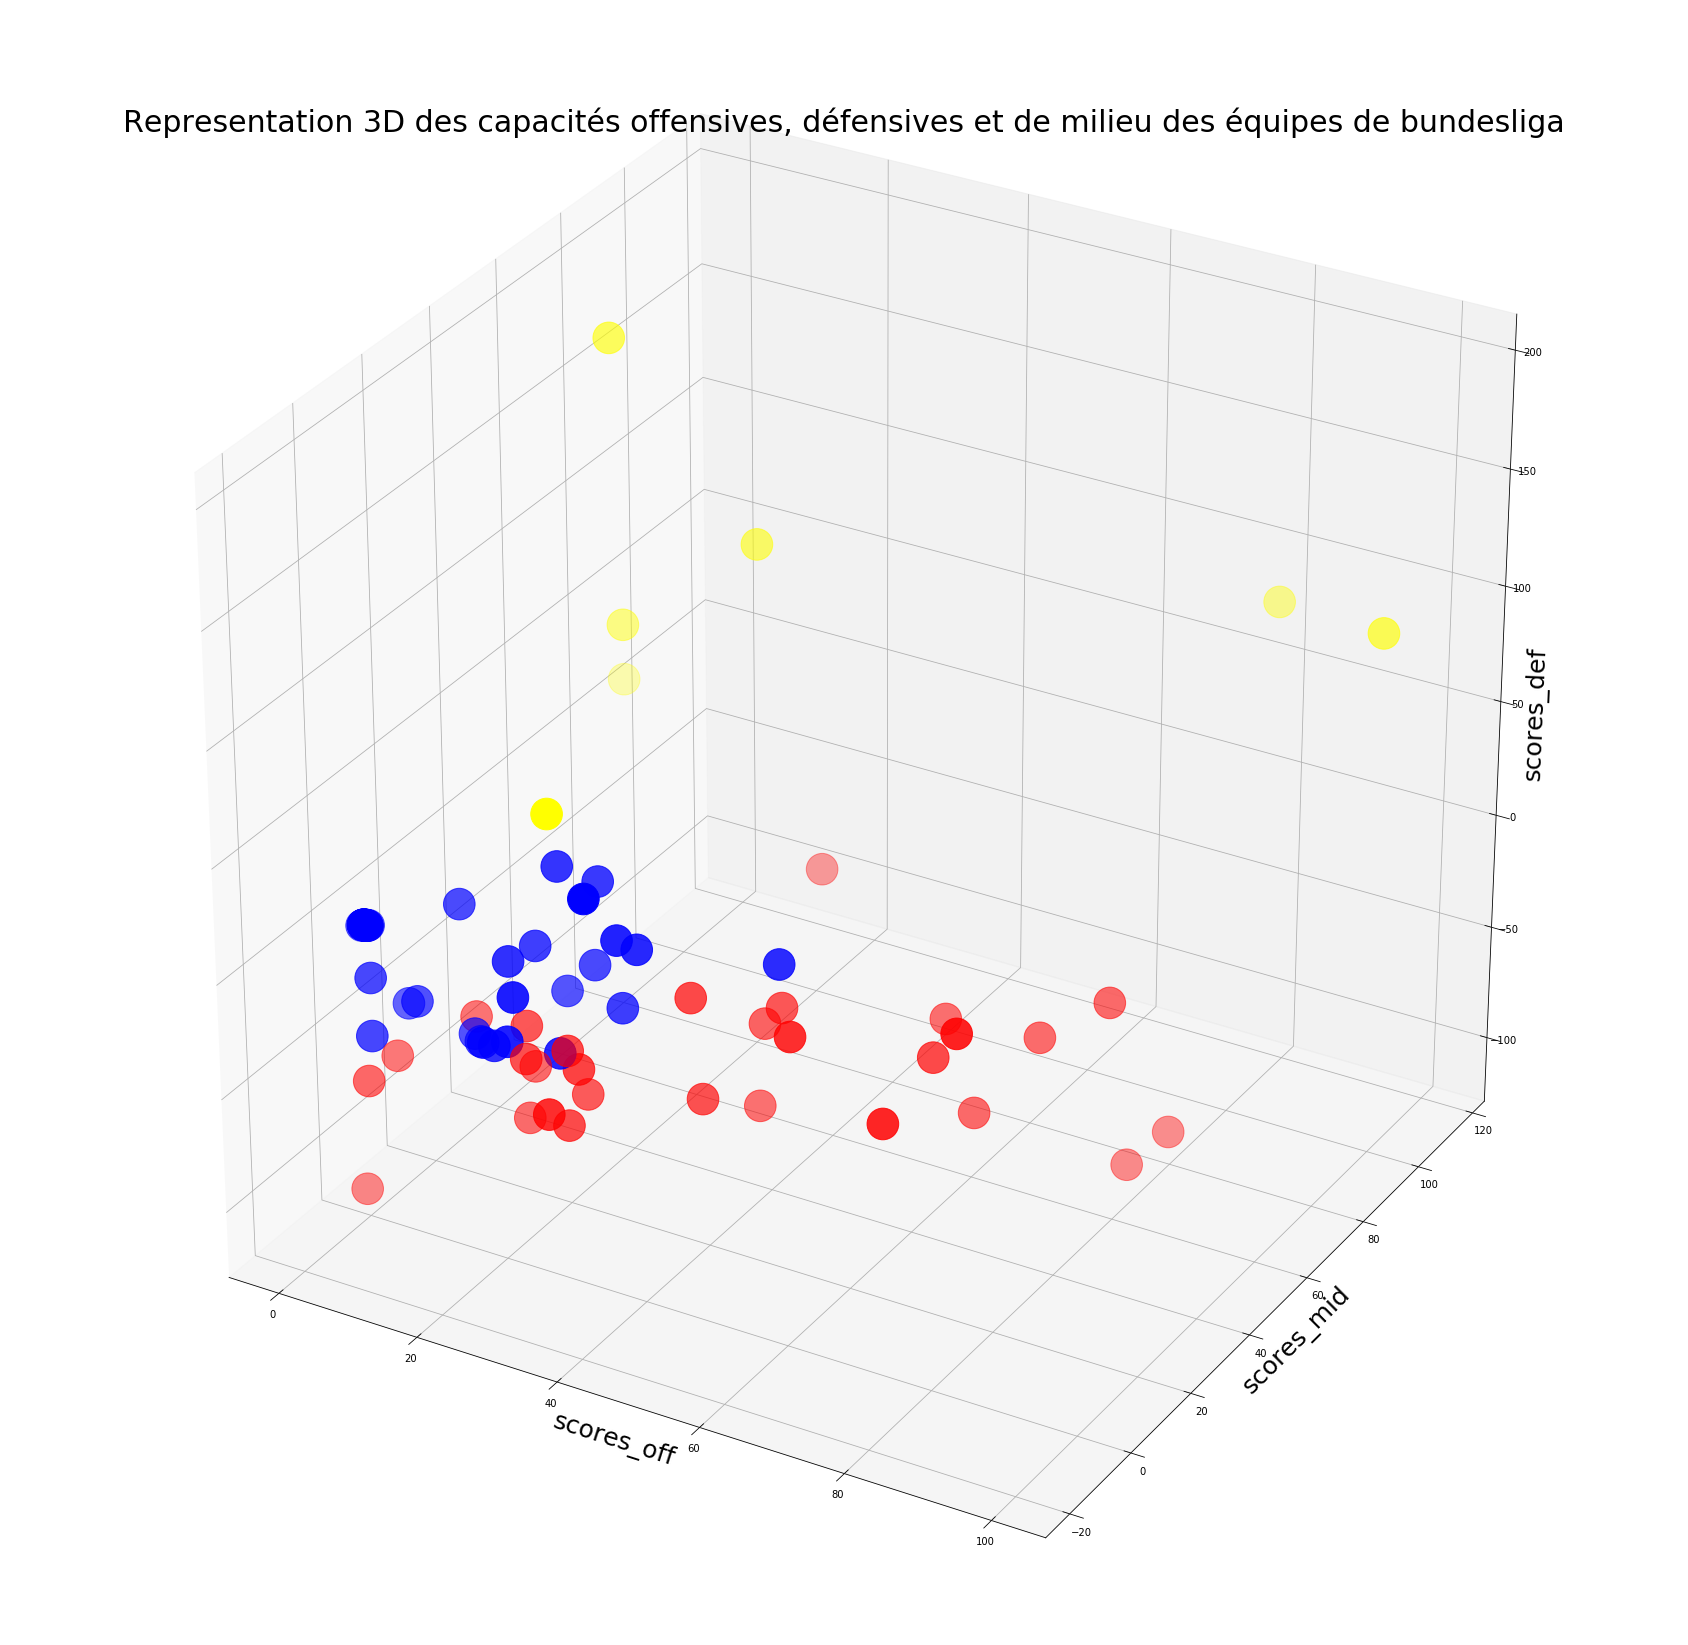

In [34]:
color = ['blue','red','yellow','green','purple']
my_color = []

for i in range(len(kmeans.labels_)):
    my_color.append(color[kmeans.labels_[i]])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d',)
ax.scatter([np.asarray(scores_off)], 
           np.asarray(scores_mid), 
           np.asarray(scores_def),
           marker='.',
           c = my_color,
           s = 4000)

ax.set_xlabel('scores_off',size = 25)
ax.set_ylabel('scores_mid',size = 25)
ax.set_zlabel('scores_def',size = 25)

ax.set_title('Representation 3D des capacités offensives, défensives et de milieu des équipes de bundesliga',size = 30)


# Clusterisation sur une année pour toutes les ligues

In [20]:
# DONNEES
df_all = pd.DataFrame(columns=['Team', 'Shots conceded pg', 'Tackles pg', 'Interceptions pg',
       'Fouls pg', 'Offsides pg', 'Shots pg', 'Shots OT pg', 'Dribbles pg',
       'Fouled pg', 'Open Play', 'Counter Attack', 'Set Piece', 'Penalty',
       'Own Goal', 'Cross pg', 'Through Ball pg', 'Long Balls pg',
       'Short Passes pg', 'Attack from left side',
       'Attack from middle of the pitch', 'Attack from right side',
       'Attempts from left side', 'Attempts from the middle',
       'Attempts from right side', 'Shot in 6 Yards Box',
       'Shot in 18 Yards Box', 'Shot outside of Box', 'Action in Own Third',
       'Action in Middle Third', 'Action in Opposition Third'])
for i in range(len(Ligue)):
    # Annee = ["2016-2017","2017-2018","2018-2019"]
    # Ligue = ["Bundesliga","Ligue1","Premier League","La Liga","Serie A"]
    df_temp = pd.read_csv("Team_Stats_"+Annee[1]+"_"+Ligue[i]+".csv").drop("Unnamed: 0",axis=1)
    df_all = df_all.append(df_temp)

In [21]:
df_num_all = df_all[['Shots conceded pg', 'Tackles pg', 'Interceptions pg',
       'Fouls pg', 'Offsides pg', 'Shots pg', 'Shots OT pg', 'Dribbles pg',
       'Fouled pg', 'Open Play', 'Counter Attack', 'Set Piece', 'Penalty',
       'Own Goal', 'Cross pg', 'Through Ball pg', 'Long Balls pg',
       'Short Passes pg']]

In [22]:
df_num_norm_all = (df_num_all-df_num_all.min())/(df_num_all.max()-df_num_all.min())
df_num_norm_all['Team'] = df_all['Team'].tolist()
df_score_all = table_score(df_num_norm_all,dico_list)


['yellow', 'blue', 'yellow', 'yellow', 'blue', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'red', 'green', 'red', 'yellow', 'yellow', 'yellow', 'blue', 'blue', 'green', 'yellow', 'red', 'red', 'green', 'red', 'green', 'blue', 'green', 'green', 'blue', 'green', 'red', 'red', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'blue', 'red', 'red', 'red', 'green', 'green', 'red', 'green', 'green', 'purple', 'yellow', 'blue', 'purple', 'blue', 'purple', 'purple', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


Text(0.5, 0.92, 'Representation 3D des capacités offensives, défensives et de milieu des équipes de 2017-2018')

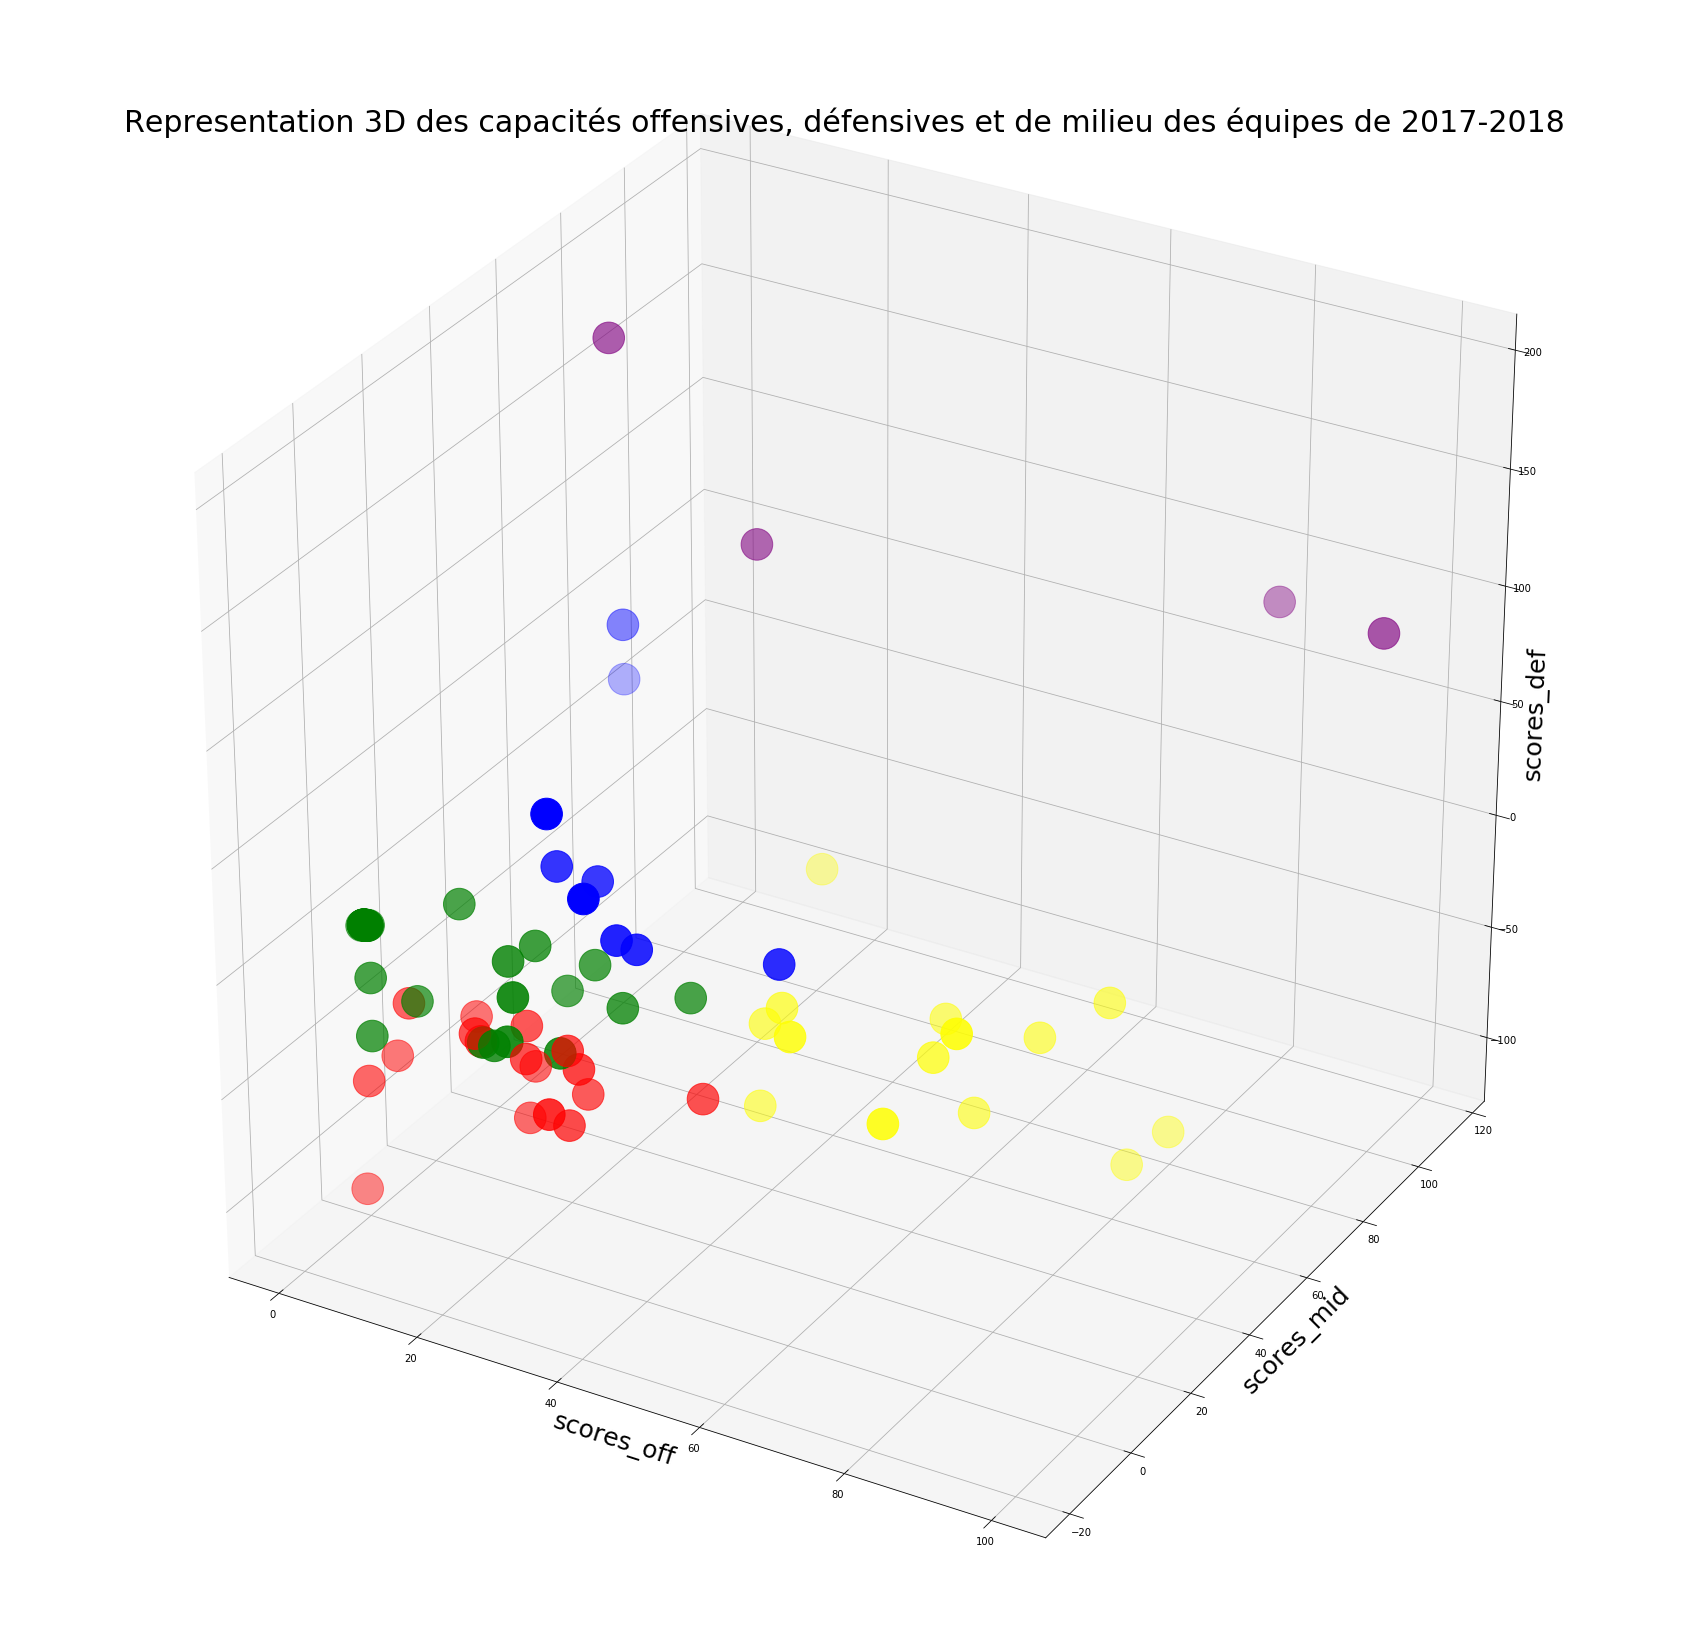

In [23]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(df_score_all["Score"].tolist())[:]
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X)

df_score_all["Score"].tolist()[:]
scores_off = []
scores_mid = []
scores_def = []
for i in range(0,len(df_score_all["Score"].tolist())):
    scores = df_score_all["Score"].tolist()[i]
    scores_off.append(scores[0])
    scores_mid.append(scores[1])
    scores_def.append(scores[2])
    
color = ['blue','red','yellow','green','purple']
my_color = []

for i in range(len(kmeans.labels_)):
    my_color.append(color[kmeans.labels_[i]])

print(my_color)    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d',)
ax.scatter([np.asarray(scores_off[:])], 
           np.asarray(scores_mid[:]), 
           np.asarray(scores_def[:]),
           marker='.',
           c = my_color,
           s = 4000)

ax.set_xlabel('scores_off',size = 25)
ax.set_ylabel('scores_mid',size = 25)
ax.set_zlabel('scores_def',size = 25)

ax.set_title('Representation 3D des capacités offensives, défensives et de milieu des équipes de 2017-2018',size = 30)


# Représentation 2D (Off-Mid)

['yellow', 'blue', 'yellow', 'yellow', 'green', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'red', 'green', 'red', 'yellow', 'yellow', 'yellow', 'green', 'green', 'green', 'yellow', 'red', 'red', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'red', 'red', 'red', 'green', 'green', 'red', 'green', 'green', 'blue', 'yellow', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


Text(0.5, 1.0, 'Representation 2D des capacités offensives et de milieu des équipes de 2017-2018')

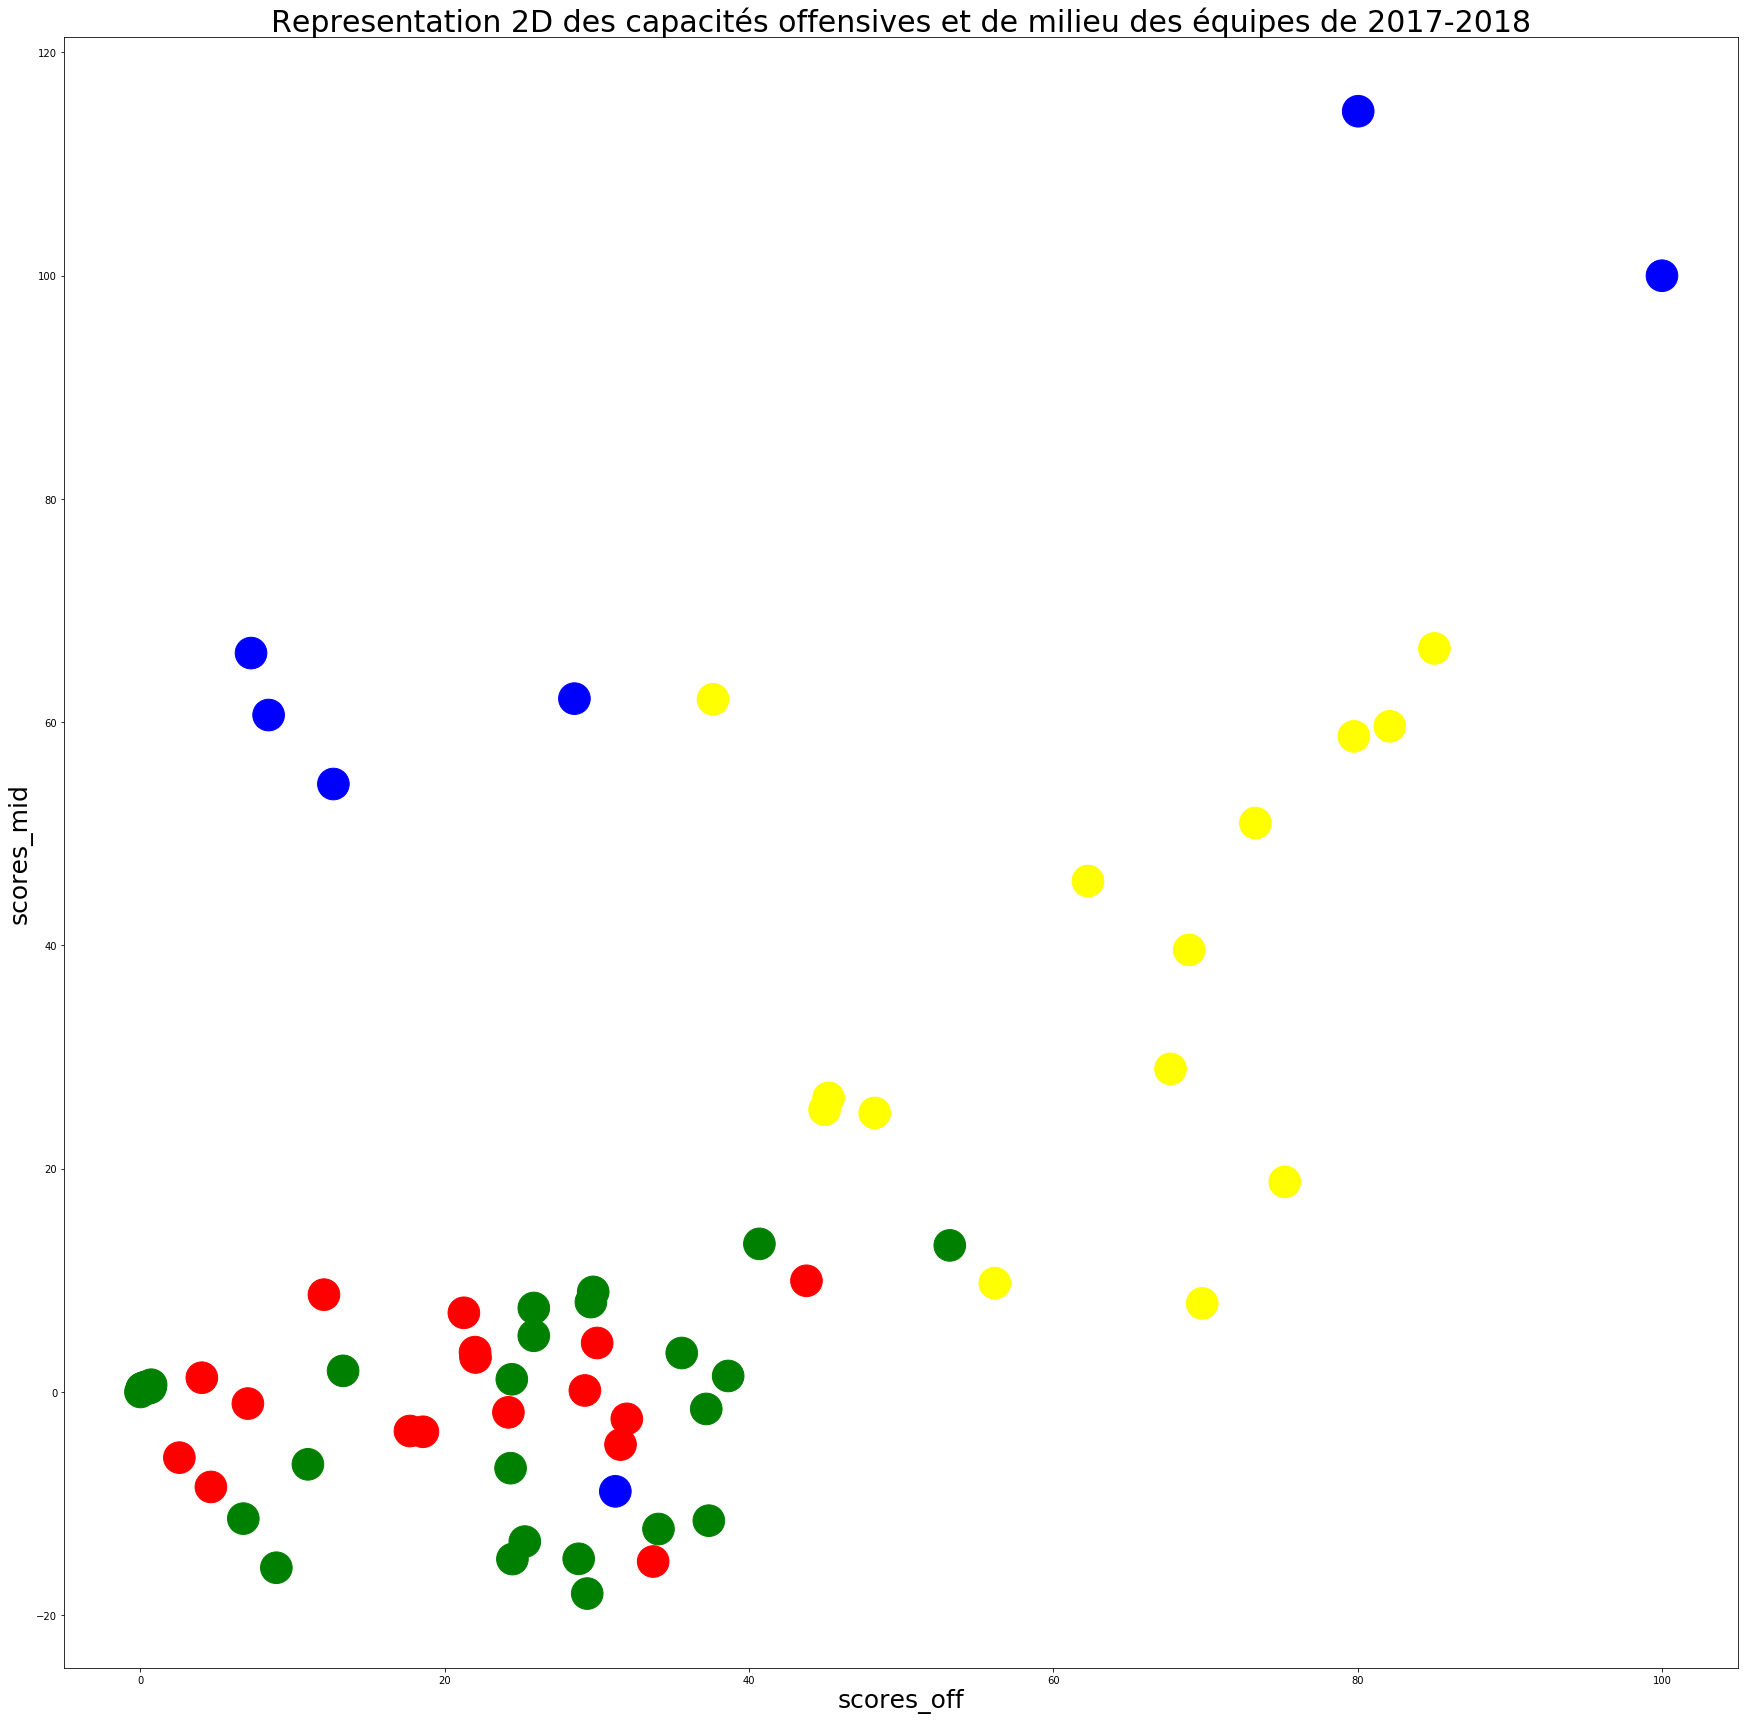

In [24]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(df_score_all["Score"].tolist())[:]
kmeans = KMeans(n_clusters = 4, random_state=0).fit(X)

df_score_all["Score"].tolist()[:]
scores_off = []
scores_mid = []
scores_def = []
for i in range(0,len(df_score_all["Score"].tolist())):
    scores = df_score_all["Score"].tolist()[i]
    scores_off.append(scores[0])
    scores_mid.append(scores[1])
    scores_def.append(scores[2])
    
color = ['blue','red','yellow','green','purple','orange','brown']
my_color = []

for i in range(len(kmeans.labels_)):
    my_color.append(color[kmeans.labels_[i]])

print(my_color)    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.scatter([np.asarray(scores_off[:])], 
           np.asarray(scores_mid[:]),
           marker='.',
           c = my_color,
           s = 4000)

ax.set_xlabel('scores_off',size = 25)
ax.set_ylabel('scores_mid',size = 25)

ax.set_title('Representation 2D des capacités offensives et de milieu des équipes de 2017-2018',size = 30)


# Représentation 2D (Off-Def)

['red', 'yellow', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


Text(0.5, 1.0, 'Representation 2D des capacités offensives et de défense des équipes de 2017-2018')

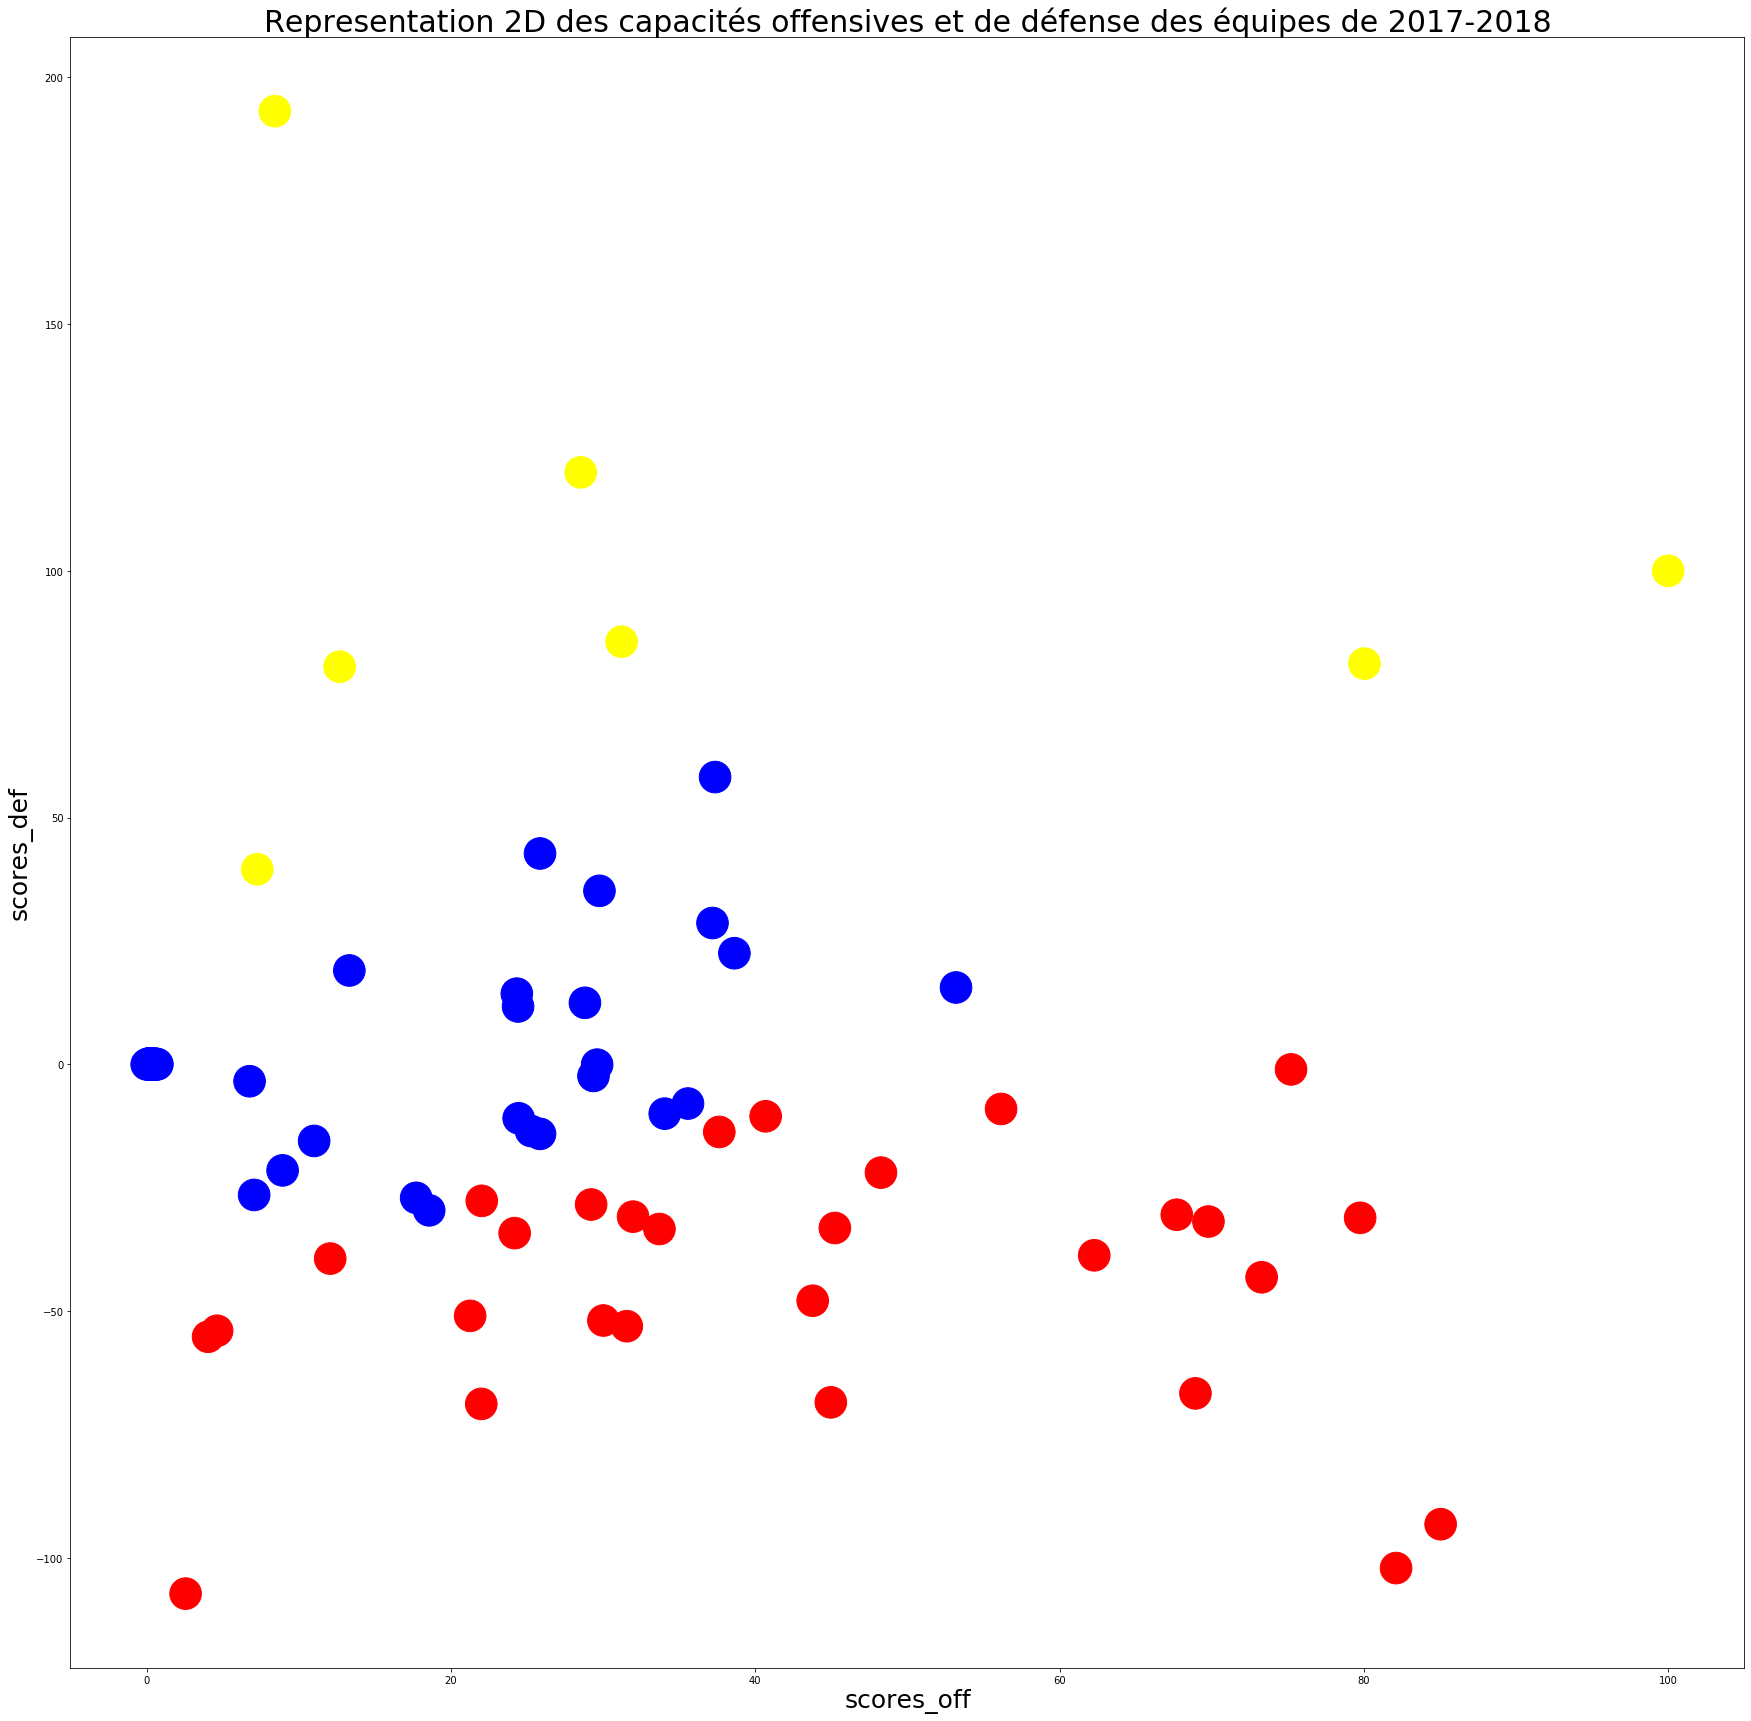

In [25]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(df_score_all["Score"].tolist())[:]
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X)

df_score_all["Score"].tolist()[:]
scores_off = []
scores_mid = []
scores_def = []
for i in range(0,len(df_score_all["Score"].tolist())):
    scores = df_score_all["Score"].tolist()[i]
    scores_off.append(scores[0])
    scores_mid.append(scores[1])
    scores_def.append(scores[2])
    
color = ['blue','red','yellow','green','purple','orange','brown']
my_color = []

for i in range(len(kmeans.labels_)):
    my_color.append(color[kmeans.labels_[i]])

print(my_color)    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
ax.scatter([np.asarray(scores_off[:])], 
           np.asarray(scores_def[:]),
           marker='.',
           c = my_color,
           s = 4000)

ax.set_xlabel('scores_off',size = 25)
ax.set_ylabel('scores_def',size = 25)

ax.set_title('Representation 2D des capacités offensives et de défense des équipes de 2017-2018',size = 30)


# Simplification des clusters par les valeurs médiannes

In [26]:
## médians

scores_all = []
names=[]
for i in range(0,len(df_score_all)):
    scores = df_score_all["Score"][i]
    names.append(df_score_all.iloc[i]["Team"])
    scores_all.append(scores)
    

tmp_df_score = pd.DataFrame(scores_all, index = names, columns = ["score_off","score_mid","score_def"])


In [27]:
meds = tmp_df_score.median()

capabilities = []
for i in range(0,len(df_score_all)):
    score_off = df_score_all["Score"].iloc[i][0]
    score_mid = df_score_all["Score"].iloc[i][1]
    score_def = df_score_all["Score"].iloc[i][2]
    capability = ["-","-","-"]

    ## OFF
    if score_off > meds[0]:
        capability[0] = "+"

    ## MID
    if score_mid > meds[1]:
        capability[1] = "+"
    
    ## DEF
    if score_def > meds[2]:
        capability[2] = "+"

    capabilities.append(capability)
    
datas = [0 for i in range(len(df_score_all))]
for i in range(0,len(df_score_all)):
    data = []
    
    for j in range(3):
        data.append(scores_all[i][j])
    
    for l in range(3):
        data.append(capabilities[i][l])
    
    datas[i] = data
    datas[i] = [data[0],data[1],data[2],data[3],data[4],data[5],datas[i]]
    
new_df_score = pd.DataFrame(datas, index = names, columns = ["score_off","score_mid","score_def","off","mid","def","resume"])

In [28]:
new_df_score.index

Index(['Bayern Munich', 'Schalke 04', 'Borussia Dortmund', 'Bayer Leverkusen',
       'RasenBallsport Leipzig', 'Hoffenheim', 'Borussia M.Gladbach',
       'VfB Stuttgart', 'Eintracht Frankfurt', 'Augsburg', 'Hertha Berlin',
       'Hannover 96', 'Werder Bremen', 'Mainz 05', 'Wolfsburg', 'Freiburg',
       'Hamburger SV', 'FC Koeln', 'Paris Saint-Germain', 'Lyon', 'Marseille',
       'Monaco', 'Montpellier', 'Bordeaux', 'Nice', 'Rennes', 'Saint-Etienne',
       'Nantes', 'Guingamp', 'Amiens', 'Dijon', 'Toulouse', 'Lille',
       'Strasbourg', 'Caen', 'Angers', 'Troyes', 'Metz', 'Manchester City',
       'Liverpool', 'Manchester United', 'Tottenham', 'Chelsea', 'Arsenal',
       'Crystal Palace', 'Burnley', 'Leicester', 'Newcastle United',
       'West Ham', 'Stoke', 'Brighton', 'Southampton', 'Everton', 'Watford',
       'Bournemouth', 'West Bromwich Albion', 'Huddersfield', 'Swansea',
       'Barcelona', 'Real Madrid', 'Atletico Madrid', 'Valencia', 'Villarreal',
       'Real Sociedad

In [29]:
new_df_score['Team'] = new_df_score.index

# Ecriture

In [30]:
new_df_score.to_csv("data_clusters_team_2017_2018.csv",sep = ',' , index = None, header=True)